<a href="https://colab.research.google.com/github/siddhantjain07/DeepLearning/blob/master/NeuralNetswithPyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [2]:
import numpy as np
import math
import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error
from tqdm.notebook import tqdm
import time
from IPython.display import HTML
import warnings 
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs

import torch

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
torch.manual_seed(0)
np.random.seed(0)
sns.set()

In [4]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

##Generating Data

In [5]:
data, labels = make_blobs(n_samples=1000, n_features=2, centers=4, random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


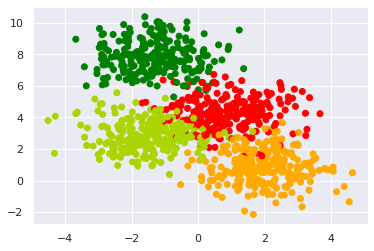

In [6]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap=my_cmap)
plt.show()

In [7]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)

(750, 2) (250, 2) (750,) (250,)


##Using torch tensors and autograd

In [8]:
X_train, X_val, Y_train, Y_val = map(torch.tensor, (X_train, X_val, Y_train, Y_val))

In [9]:
print(X_train.shape, Y_train.shape)

torch.Size([750, 2]) torch.Size([750])


In [10]:
# a = torch.rand(2, 4)
# print(a)
# print(a.exp())
# print(a.exp().sum(-1))
# print(a.exp().sum(-1).shape)
# print(a.exp().sum(-1).unsqueeze(-1))
# print(a.exp().sum(-1).unsqueeze(-1).shape)
# print(a.exp()/a.exp().sum(-1).unsqueeze(-1))

In [11]:
def model(x):
  z1 = torch.matmul(x, weights1) + bias1
  a1 = z1.sigmoid()
  z2 = torch.matmul(a1, weights2) + bias2
  a2 = z2.exp() / z2.exp().sum(-1).unsqueeze(-1)
  return a2 

In [12]:
y_hat = torch.tensor([[0.1, 0.2, 0.3, 0.4], [0.8, 0.1, 0.04, 0.06]])
y = torch.tensor([2, 0])
print(y_hat.shape)
print(y_hat[range(y_hat.shape[0]), y])

(torch.argmax(y_hat, dim=1) == y).float().mean()

torch.Size([2, 4])
tensor([0.3000, 0.8000])


tensor(0.5000)

In [13]:
def loss_function(y_hat, y):
  return -(y_hat[range(y.shape[0]), y].log()).mean()

In [14]:
def accuracy(y_hat, y):
  pred = torch.argmax(y_hat, dim=1)
  return (pred == y).float().mean()

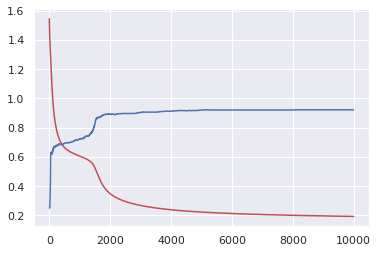

Loss before training 1.5456441640853882
Loss after training 0.19288592040538788


In [15]:
torch.manual_seed(0)

weights1 = torch.randn(2, 2)/ math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4)/ math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

X_train = X_train.float()
Y_train = Y_train.long()

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = loss_function(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= learning_rate * weights1.grad
    bias1 -= learning_rate * bias1.grad
    weights2 -= learning_rate * weights2.grad
    bias2 -= learning_rate * bias2.grad
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

##Using NN functional 

In [16]:
import torch.nn.functional as F

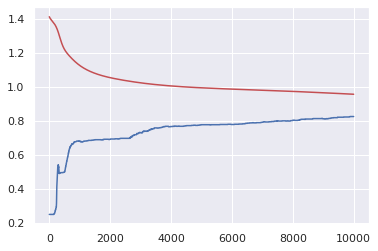

Loss before training 1.4111980199813843
Loss after training 0.9561843276023865


In [17]:
torch.manual_seed(0)

weights1 = torch.randn(2, 2)/ math.sqrt(2)
weights1.requires_grad_()
bias1 = torch.zeros(2, requires_grad=True)

weights2 = torch.randn(2, 4)/ math.sqrt(2)
weights2.requires_grad_()
bias2 = torch.zeros(4, requires_grad=True)

learning_rate = 0.2
epochs = 10000

loss_arr = []
acc_arr = []

for epoch in range(epochs):
  y_hat = model(X_train)
  loss = F.cross_entropy(y_hat, Y_train)
  loss.backward()
  loss_arr.append(loss.item())
  acc_arr.append(accuracy(y_hat, Y_train))

  with torch.no_grad():
    weights1 -= learning_rate * weights1.grad
    bias1 -= learning_rate * bias1.grad
    weights2 -= learning_rate * weights2.grad
    bias2 -= learning_rate * bias2.grad
    weights1.grad.zero_()
    bias1.grad.zero_()
    weights2.grad.zero_()
    bias2.grad.zero_()

plt.plot(loss_arr, 'r-')
plt.plot(acc_arr, 'b-')
plt.show()
print('Loss before training', loss_arr[0])
print('Loss after training', loss_arr[-1])

##Using NN. parameters

In [18]:
import torch.nn as nn

In [19]:
class FirstNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weights1 = nn.Parameter(torch.randn(2 ,2) / math.sqrt(2))
    self.bias1 = nn.Parameter(torch.zeros(2))
    self.weights2 = nn.Parameter(torch.randn(2 ,4) / math.sqrt(2))
    self.bias2 = nn.Parameter(torch.zeros(4))

  def forward(self, X):
    z1 = torch.matmul(X, self.weights1) + self.bias1
    a1 = z1.sigmoid()
    z2 = torch.matmul(a1, self.weights2) + self.bias2
    a2 = z2.exp() / z2.exp().sum(-1).unsqueeze(-1)
    return a2

In [20]:
def fit(epochs = 1000, learning_rate = 1):
  loss_arr = []
  acc_arr = []

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_arr.append(accuracy(y_hat, Y_train))
    loss.backward()

    with torch.no_grad():
      for param in fn.parameters():
        param -= learning_rate * param.grad
      fn.zero_grad()

  plt.plot(loss_arr, 'r-')
  plt.plot(acc_arr , 'b-')
  plt.show()
  print("Loss before training :", loss_arr[0])
  print("Loss after training :", loss_arr[-1])

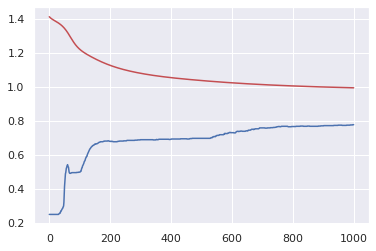

Loss before training : 1.4111980199813843
Loss after training : 0.9939236640930176


In [21]:
fn = FirstNetwork()
fit()

##Using NN.Linear and Optim

In [22]:
class FirstNetwork_v1(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2, 2)
    self.lin2 = nn.Linear(2, 4)

  def forward(self, X):
    z1 = self.lin1(X)
    a1 = z1.sigmoid()
    z2 = self.lin2(a1)
    a2 = z2.exp() / z2.exp().sum(-1).unsqueeze(-1)
    return a2

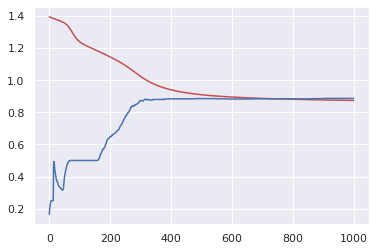

Loss before training : 1.395160436630249
Loss after training : 0.8738409876823425


In [23]:
fn = FirstNetwork_v1()
fit()

In [24]:
from torch import optim

In [25]:
def fit_v1(epochs=1000, learning_rate=1):
  loss_arr = []
  acc_aarr = []
  opt = optim.SGD(fn.parameters(), lr=learning_rate)

  for epoch in range(epochs):
    y_hat = fn(X_train)
    loss = F.cross_entropy(y_hat, Y_train)
    loss_arr.append(loss.item())
    acc_aarr.append(accuracy(y_hat, Y_train))

    loss.backward()
    opt.step()
    opt.zero_grad()


  plt.plot(loss_arr, 'r-')
  plt.plot(acc_aarr , 'b-')
  plt.show()
  print("Loss before training :", loss_arr[0])
  print("Loss after training :", loss_arr[-1])

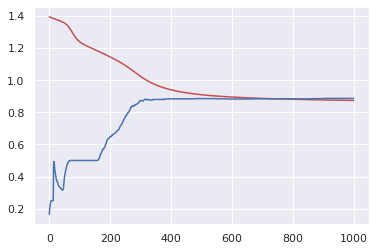

Loss before training : 1.395160436630249
Loss after training : 0.8738409876823425


In [29]:
fn = FirstNetwork_v1()
fit_v1()

##Using nn.Sequential

In [30]:
class FirstNetwork_v2(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 2),
        nn.Sigmoid(),
        nn.Linear(2, 4),
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

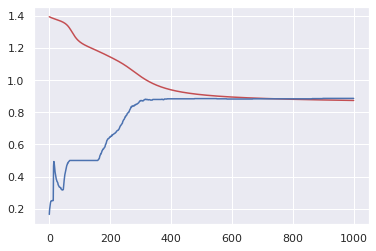

Loss before training : 1.395160436630249
Loss after training : 0.8738410472869873


In [31]:
fn = FirstNetwork_v2()
fit_v1()

In [32]:
def fit_v2(x, y, model, opt, loss_fn, epochs=1000):

  for epoch in range(epochs):
    loss = loss_fn(model(x), y)

    loss.backward()
    opt.step()
    opt.zero_grad()

  return loss.item()

In [35]:
fn = FirstNetwork_v2()
loss_fn = F.cross_entropy
opt = optim.SGD(fn.parameters(), lr=1)
fit_v2(X_train, Y_train, fn, opt, loss_fn)

0.8738410472869873

##Running it on CPU

In [46]:
device = torch.device("cpu")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)

tic = time.time()
print("Final Loss:", fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print("Time taken :", toc-tic)

Final Loss: 1.395160436630249
Time taken : 0.8304407596588135


In [47]:
device = torch.device("cuda")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v2()
fn.to(device)

tic = time.time()
print("Final Loss:", fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print("Time taken :", toc-tic)

Final Loss: 1.395159363746643
Time taken : 0.9834051132202148


In [60]:
class FirstNetwork_v3(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2, 1024*4),
        nn.Sigmoid(),
        nn.Linear(1024*4, 4),
        nn.Softmax()
    )

  def forward(self, X):
    return self.net(X)

In [61]:
device = torch.device("cpu")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)

tic = time.time()
print("Final Loss:", fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print("Time taken :", toc-tic)

Final Loss: 1.3890224695205688
Time taken : 21.424841165542603


In [63]:
device = torch.device("cuda")

X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FirstNetwork_v3()
fn.to(device)

tic = time.time()
print("Final Loss:", fit_v2(X_train, Y_train, fn, opt, loss_fn))
toc = time.time()
print("Time taken :", toc-tic)

Final Loss: 1.3890228271484375
Time taken : 2.5609188079833984
